In [1]:
!pip install -U -q google-genai ultralytics pillow
!apt-get update
!apt-get install -y fonts-noto-cjk fonts-thai-tlwg fonts-dejavu-core
!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansThai/NotoSansThai-Regular.ttf
!mkdir -p /usr/share/fonts/truetype/noto-thai/
!cp NotoSansThai-Regular.ttf /usr/share/fonts/truetype/noto-thai/
!fc-cache -fv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.4 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
google_api_key = userdata.get('GOOGLE_API_KEY_2')

In [31]:
def clean_results(results):
    """Clean the results for visualization."""
    return results.strip().removeprefix("```json").removesuffix("```").strip()

def inference(image, prompt, temp=0.5):
    """
    Performs inference using Google Gemini model.
    """
    response = client.models.generate_content(
        model="gemini-2.5-flash-preview-05-20",
        contents=[prompt, image],
        config=types.GenerateContentConfig(
            temperature=temp,
        ),
    )
    return response.text

def read_image(image_path):
    """Read image and return PIL Image object with dimensions"""
    image = Image.open(image_path)
    w, h = image.size
    return image, w, h

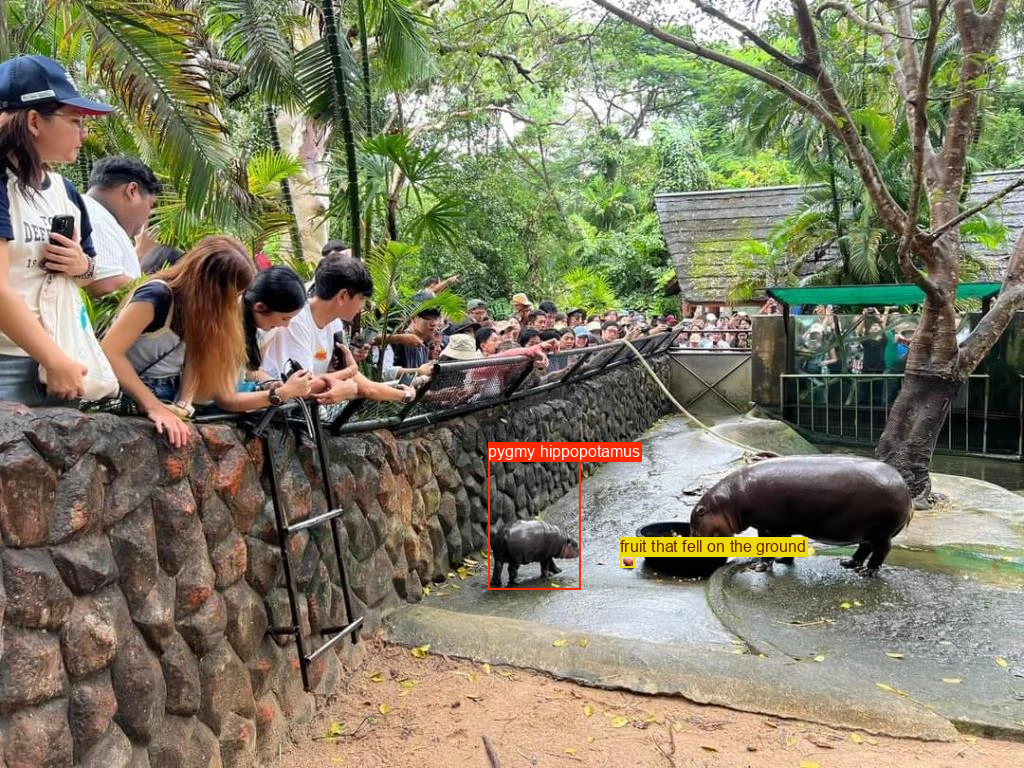

In [32]:

prompt = """
Detect the 2d bounding box :
pygmy hippopotamus +
Fruit that fell on the ground.
"""


output_prompt = "Return just box_2d and labels, no additional text."

image, w, h = read_image("moo.webp")

results = inference(image, prompt + output_prompt)


cln_results = json.loads(clean_results(results))

annotator = Annotator(image,line_width=2, font_size=16)

for idx, item in enumerate(cln_results):

    y1, x1, y2, x2 = item["box_2d"]
    y1 = y1 / 1000 * h
    x1 = x1 / 1000 * w
    y2 = y2 / 1000 * h
    x2 = x2 / 1000 * w

    if x1 > x2:
        x1, x2 = x2, x1
    if y1 > y2:
        y1, y2 = y2, y1

    annotator.box_label([x1, y1, x2, y2], label=item["label"], color=colors(idx, True))

Image.fromarray(annotator.result())

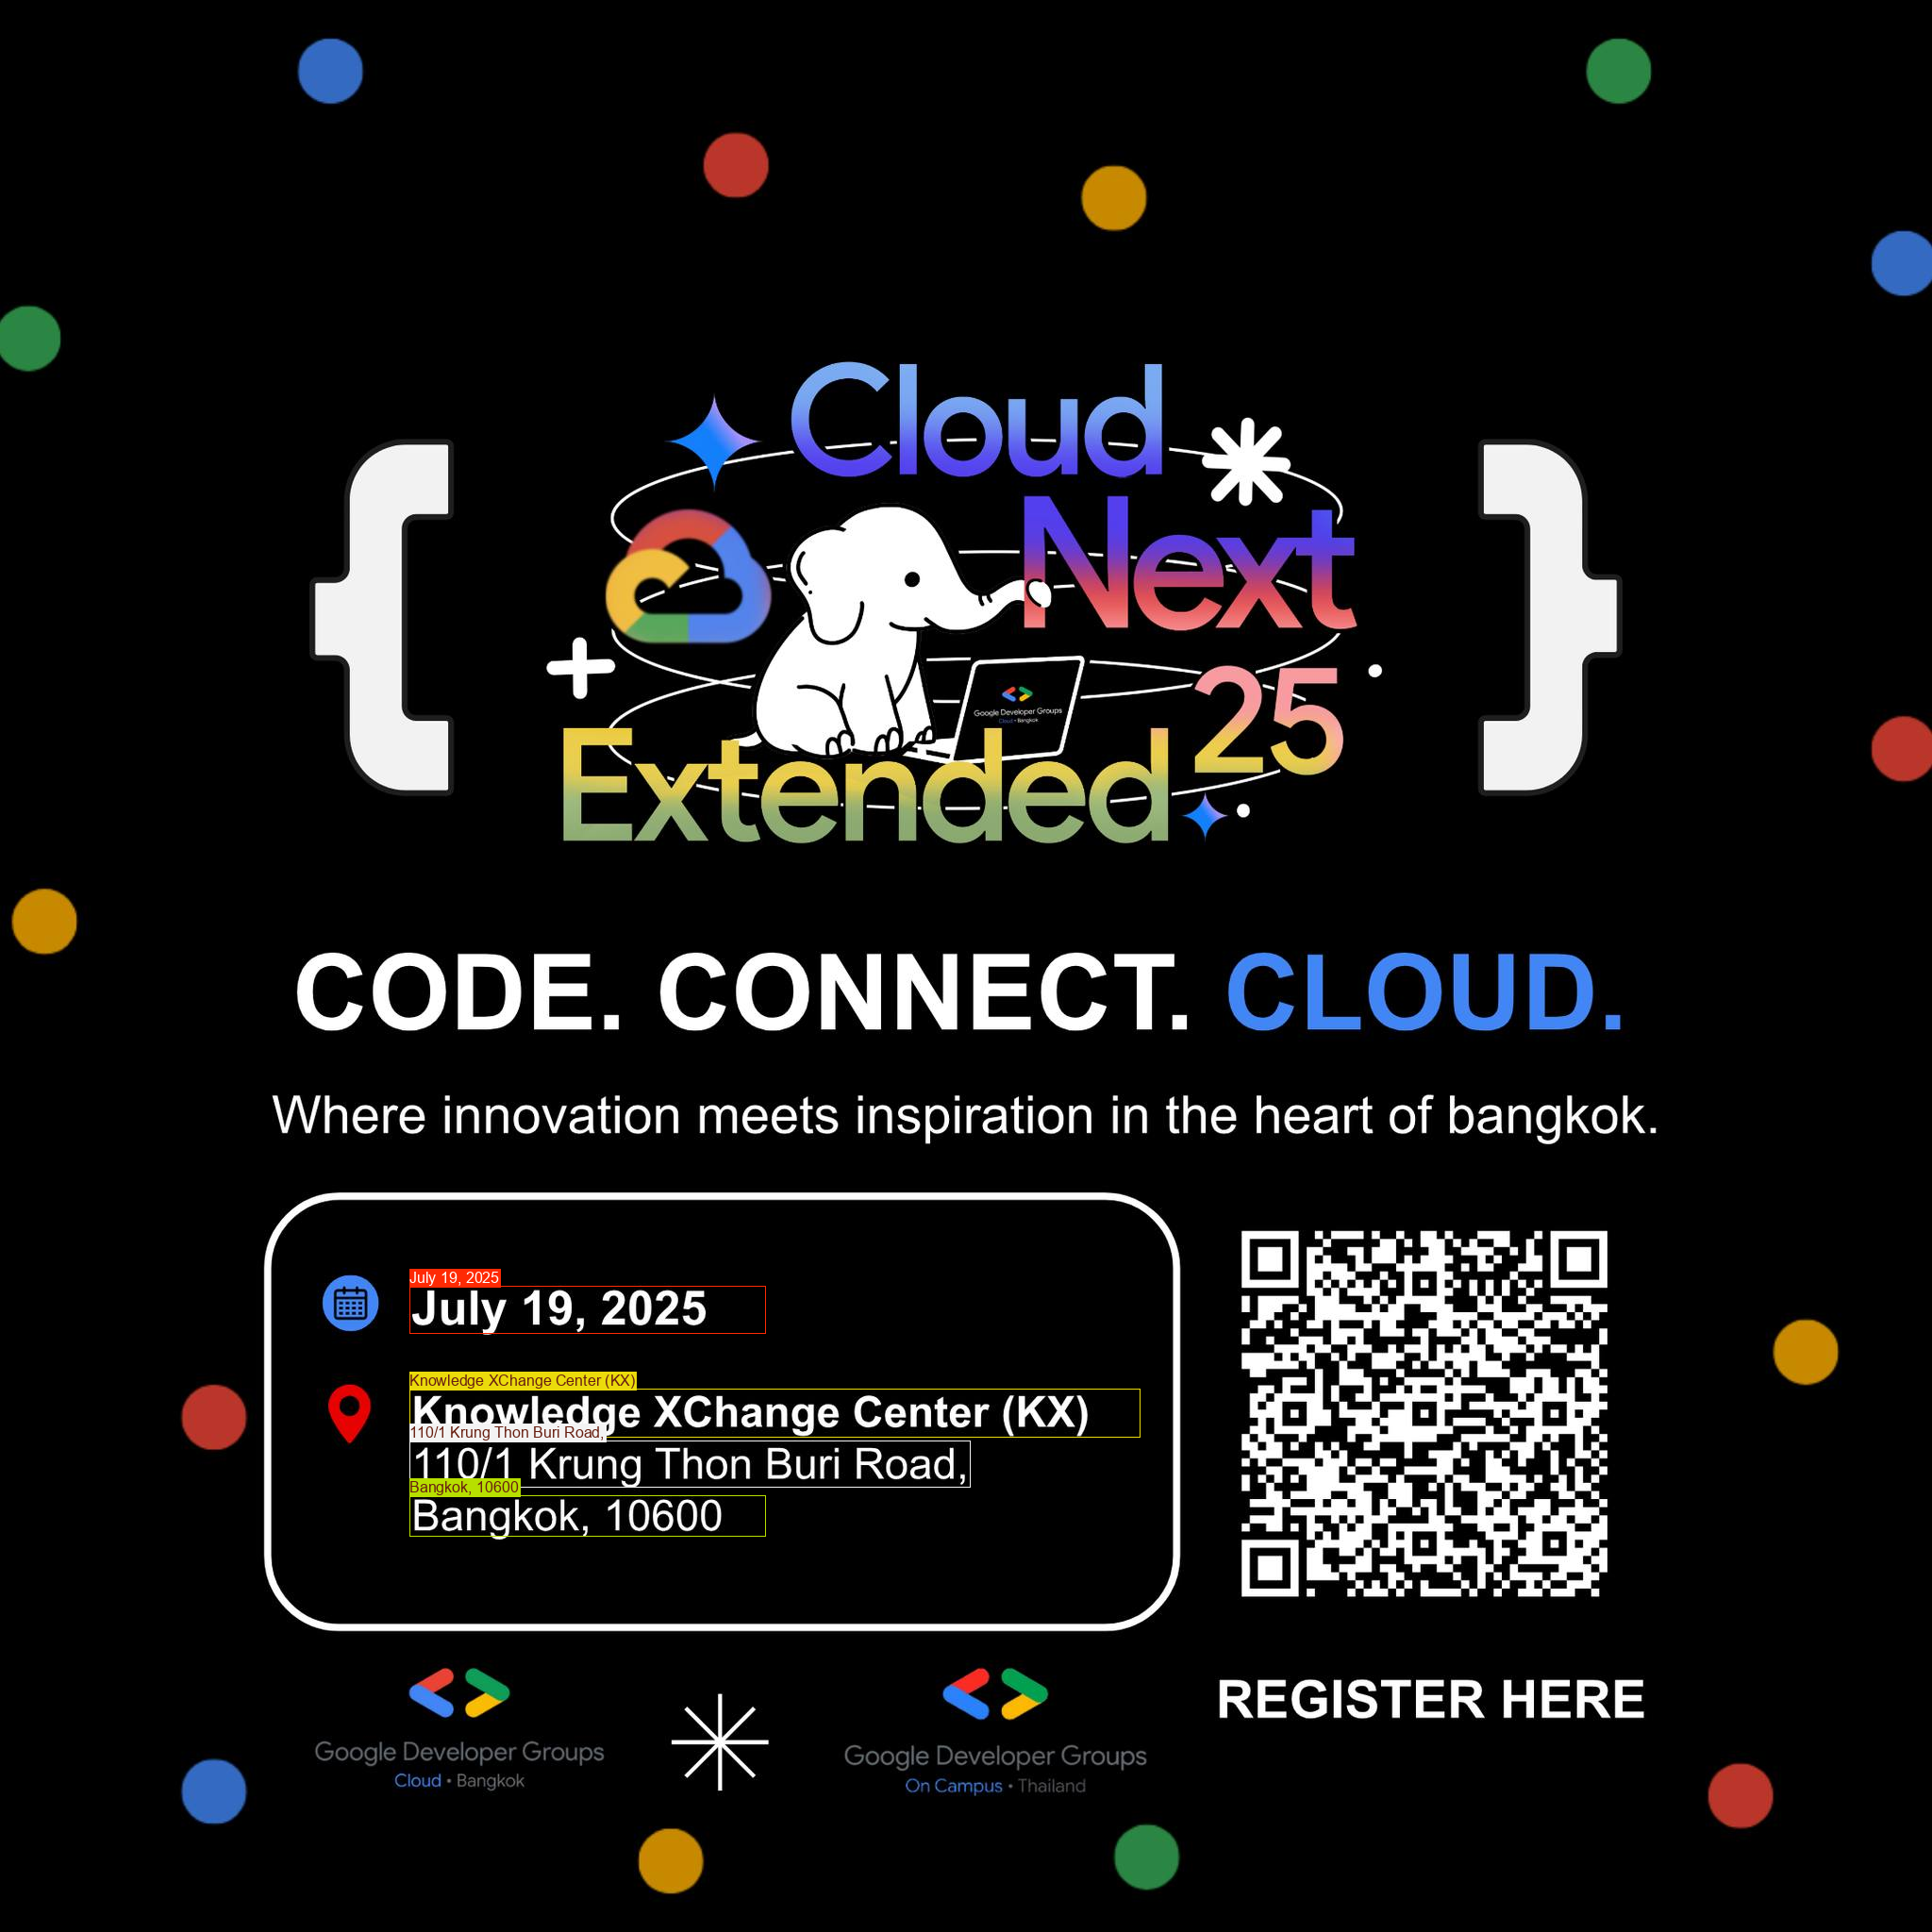

In [26]:
# Define the text prompt
prompt = """
Extract the text from the image
"""

output_prompt = """
Return just box_2d which will be location of detected text areas + label that inside white rectangle box only"""

image, w, h = read_image("gdg.jpg")

results = inference(image, prompt + output_prompt)

cln_results = json.loads(clean_results(results))


annotator = Annotator(image,line_width=1, font_size=16)



for idx, item in enumerate(cln_results):
    y1, x1, y2, x2 = item["box_2d"]
    y1 = y1 / 1000 * h
    x1 = x1 / 1000 * w
    y2 = y2 / 1000 * h
    x2 = x2 / 1000 * w

    if x1 > x2:
        x1, x2 = x2, x1
    if y1 > y2:
        y1, y2 = y2, y1


    annotator.box_label([x1, y1, x2, y2], label=item["label"], color=colors(idx, True))


Image.fromarray(annotator.result())

Image dimensions: 916x916
Extracting text with Gemini...
Raw Gemini response:
```json
[
  {
    "box_2d": [372, 321, 451, 678],
    "label": "อาหาร"
  },
  {
    "box_2d": [447, 355, 526, 642],
    "label": "ตามสั่ง"
  },
  {
    "box_2d": [587, 309, 687, 689],
    "label": "ก๋วยเตี๋ยว"
  },
  {
    "box_2d": [743, 316, 788, 381],
    "label": "รับ"
  },
  {
    "box_2d": [737, 410, 792, 638],
    "label": "ข้าวกล่อง"
  },
  {
    "box_2d": [787, 322, 827, 375],
    "label": "ทํา"
  },
  {
    "box_2d": [798, 410, 836, 659],
    "label": "บริการจัดส่งถึงที่"
  }
]
```
--------------------------------------------------
Cleaned results:
[
  {
    "box_2d": [372, 321, 451, 678],
    "label": "อาหาร"
  },
  {
    "box_2d": [447, 355, 526, 642],
    "label": "ตามสั่ง"
  },
  {
    "box_2d": [587, 309, 687, 689],
    "label": "ก๋วยเตี๋ยว"
  },
  {
    "box_2d": [743, 316, 788, 381],
    "label": "รับ"
  },
  {
    "box_2d": [737, 410, 792, 638],
    "label": "ข้าวกล่อง"
  },
  {
    "box_2d"

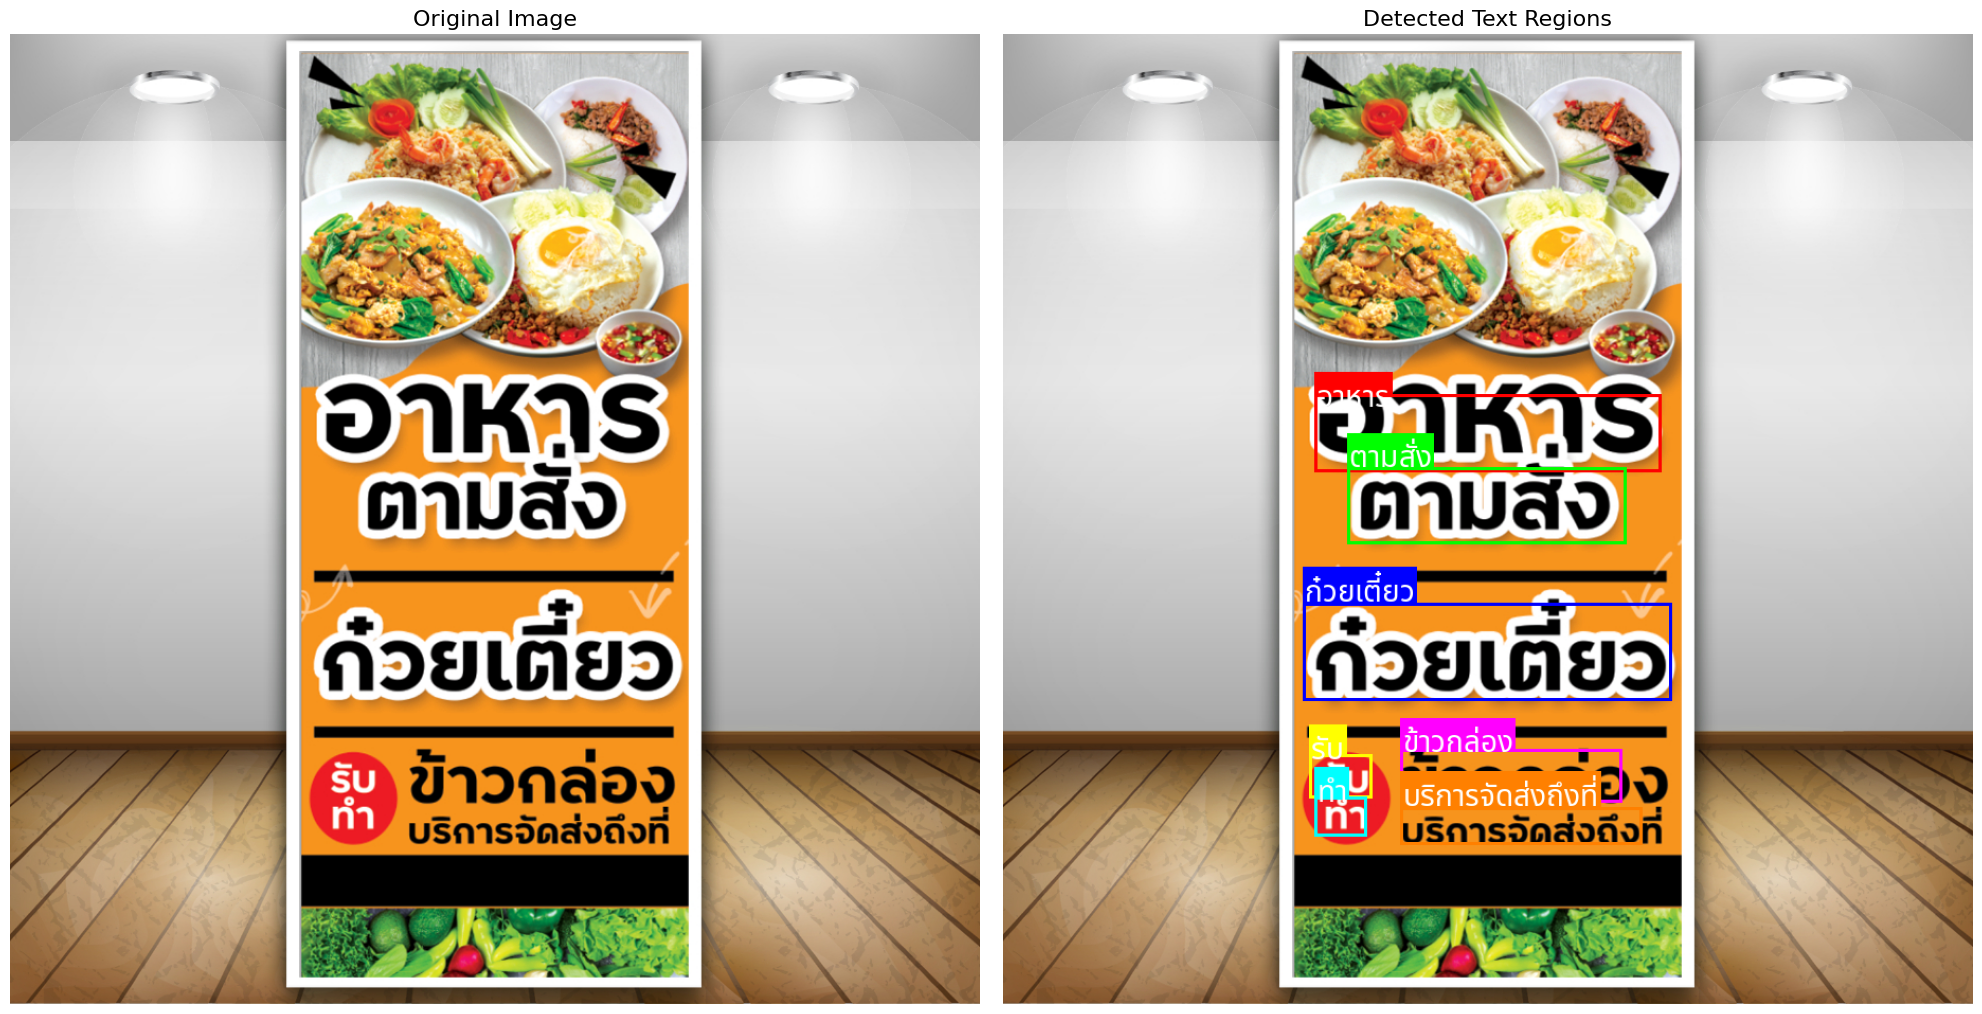


EXTRACTED TEXT SUMMARY

Region 1:
  Text: อาหาร
  Box: [372, 321, 451, 678]

Region 2:
  Text: ตามสั่ง
  Box: [447, 355, 526, 642]

Region 3:
  Text: ก๋วยเตี๋ยว
  Box: [587, 309, 687, 689]

Region 4:
  Text: รับ
  Box: [743, 316, 788, 381]

Region 5:
  Text: ข้าวกล่อง
  Box: [737, 410, 792, 638]

Region 6:
  Text: ทํา
  Box: [787, 322, 827, 375]

Region 7:
  Text: บริการจัดส่งถึงที่
  Box: [798, 410, 836, 659]


In [15]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import ultralytics
from google import genai
from google.genai import types
from ultralytics.utils.downloads import safe_download
from ultralytics.utils.plotting import Annotator, colors
import os


google_api_key = google_api_key

# Initialize the Gemini client
client = genai.Client(api_key=google_api_key)

def inference(image, prompt, temp=0.5):
    """
    Performs inference using Google Gemini model.
    """
    response = client.models.generate_content(
        model="gemini-2.5-flash-preview-05-20",
        contents=[prompt, image],
        config=types.GenerateContentConfig(
            temperature=temp,
        ),
    )
    return response.text

def read_image(image_path):
    """Read image and return PIL Image object with dimensions"""
    image = Image.open(image_path)
    w, h = image.size
    return image, w, h

def clean_results(results):
    """Clean and parse the JSON results from Gemini"""
    cleaned = results.strip()

    if cleaned.startswith('```json'):
        cleaned = cleaned[7:]
    if cleaned.endswith('```'):
        cleaned = cleaned[:-3]

    cleaned = cleaned.strip()

    return cleaned

def get_thai_font():
    """
    Get Thai font for Google Colab environment
    """
    thai_fonts = [
        "/usr/share/fonts/truetype/noto-thai/NotoSansThai-Regular.ttf",
        "/usr/share/fonts/truetype/noto/NotoSansThai-Regular.ttf",
        "/usr/share/fonts/truetype/thai/Kinnari-Regular.ttf",
        "/usr/share/fonts/truetype/thai/Loma-Regular.ttf",
        "/usr/share/fonts/truetype/thai/Norasi-Regular.ttf",
        "/usr/share/fonts/truetype/thai/Purisa-Regular.ttf",
        "/usr/share/fonts/truetype/thai/Sawasdee-Regular.ttf",
        "/usr/share/fonts/truetype/thai/TlwgMono-Regular.ttf",
        "/usr/share/fonts/truetype/thai/TlwgTypewriter-Regular.ttf",
        "/usr/share/fonts/truetype/thai/Umpush-Regular.ttf",
        "/usr/share/fonts/truetype/thai/Waree-Regular.ttf",
        "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",
    ]

    available_fonts = []
    for font_path in thai_fonts:
        if os.path.exists(font_path):
            available_fonts.append(font_path)

    print("Available Thai fonts:")
    for font in available_fonts:
        print(f"  - {font}")

    for font_path in thai_fonts:
        try:
            font = ImageFont.truetype(font_path, 28)
            print(f"Successfully loaded font: {font_path}")

            test_thai = "อาหาร"
            try:
                test_img = Image.new('RGB', (100, 50), 'white')
                test_draw = ImageDraw.Draw(test_img)
                test_draw.text((10, 10), test_thai, fill='black', font=font)
                print(f"Thai character test passed for: {font_path}")
                return font
            except Exception as e:
                print(f"Thai character test failed for {font_path}: {e}")
                continue

        except Exception as e:
            print(f"Failed to load {font_path}: {e}")
            continue

    print("WARNING: Using default font - Thai characters may not display properly")
    return ImageFont.load_default()

def draw_thai_text_boxes_colab(image, detections):
    """
    Draw bounding boxes with Thai text support for Google Colab
    """
    print(f"Drawing function called with {len(detections)} detections")

    draw_img = image.copy()
    draw = ImageDraw.Draw(draw_img)

    font = get_thai_font()

    color_palette = [
        (255, 0, 0),    # Red
        (0, 255, 0),    # Green
        (0, 0, 255),    # Blue
        (255, 255, 0),  # Yellow
        (255, 0, 255),  # Magenta
        (0, 255, 255),  # Cyan
        (255, 128, 0),  # Orange
        (128, 0, 255),  # Purple
    ]

    w, h = image.size
    print(f"Image size for drawing: {w}x{h}")

    for idx, item in enumerate(detections):
        print(f"Processing detection {idx+1}: {item}")

        y1, x1, y2, x2 = item["box_2d"]

        y1 = y1 / 1000 * h
        x1 = x1 / 1000 * w
        y2 = y2 / 1000 * h
        x2 = x2 / 1000 * w

        print(f"  Scaled coordinates: ({x1}, {y1}) to ({x2}, {y2})")

        if x1 > x2:
            x1, x2 = x2, x1
        if y1 > y2:
            y1, y2 = y2, y1

        color = color_palette[idx % len(color_palette)]
        print(f"  Using color: {color}")

        draw.rectangle([x1, y1, x2, y2], outline=color, width=3)
        print(f"  Drew rectangle: [{x1}, {y1}, {x2}, {y2}]")

        label = item["label"]
        print(f"  Drawing label: '{label}'")

        try:
            bbox = draw.textbbox((0, 0), label, font=font)
            text_width = bbox[2] - bbox[0]
            text_height = bbox[3] - bbox[1]
        except:
            # Fallback for older PIL versions
            text_width, text_height = draw.textsize(label, font=font)

        # Position label above the box
        label_y = max(0, y1 - text_height - 5)

        # Draw background rectangle for text
        draw.rectangle([x1, label_y, x1 + text_width + 4, label_y + text_height + 4],
                      fill=color, outline=color)

        # Draw text in white
        draw.text((x1 + 2, label_y + 2), label, fill=(255, 255, 255), font=font)
        print(f"  Drew text at position: ({x1 + 2}, {label_y + 2})")

    print("All drawings completed")
    return draw_img

def extract_thai_text_ocr_colab(image_path):
    """
    Complete pipeline for Thai text extraction and visualization in Google Colab
    """
    # Enhanced prompt for better Thai text extraction
    prompt = """
    Extract all text from this image, including Thai text.
    Pay special attention to Thai characters and preserve their accuracy.
    Include both Thai and English text if present.
    For each text region detected, provide the bounding box coordinates and the exact text content.
    Make sure to capture all text elements including menu items, prices, and descriptions.
    """

    output_prompt = """
    Return the results in JSON format with the following structure:
    [
        {
            "box_2d": [y1, x1, y2, x2],
            "label": "extracted_text_here"
        }
    ]
    where coordinates are normalized from 0 to 1000.
    Return only the JSON array, no additional text or formatting.
    Do not include newline characters (\\n) in the label text - use spaces instead.
    """

    # Read image
    image, w, h = read_image(image_path)

    print(f"Image dimensions: {w}x{h}")

    # Perform inference
    print("Extracting text with Gemini...")
    results = inference(image, prompt + output_prompt)

    print("Raw Gemini response:")
    print(results)
    print("-" * 50)

    # Clean and parse results
    try:
        cleaned_results = clean_results(results)
        print("Cleaned results:")
        print(cleaned_results)
        print("-" * 50)

        cln_results = json.loads(cleaned_results)
        print(f"Successfully parsed {len(cln_results)} text regions")

        # Debug: Print each detection
        print("Parsed detections:")
        for i, det in enumerate(cln_results):
            print(f"  {i+1}: Box={det['box_2d']}, Text='{det['label']}'")
        print("-" * 50)

    except json.JSONDecodeError as e:
        print(f"JSON parsing error at position {e.pos}: {e.msg}")
        print(f"Character at error position: '{cleaned_results[e.pos] if e.pos < len(cleaned_results) else 'EOF'}'")

        # Try a more robust approach
        try:
            # Remove any potential invisible characters or encoding issues
            cleaned_results = cleaned_results.encode('utf-8').decode('utf-8')
            # Try again
            cln_results = json.loads(cleaned_results)
            print(f"Successfully parsed {len(cln_results)} text regions after encoding fix")

        except Exception as e2:
            print(f"All parsing attempts failed: {e2}")
            print("Attempting to manually extract data...")

            # Manual extraction as last resort
            import re
            cln_results = []

            # Extract box_2d and label patterns
            pattern = r'"box_2d":\s*\[([^\]]+)\].*?"label":\s*"([^"]+)"'
            matches = re.findall(pattern, results, re.DOTALL)

            for match in matches:
                coords = [int(x.strip()) for x in match[0].split(',')]
                label = match[1]
                cln_results.append({"box_2d": coords, "label": label})

            if cln_results:
                print(f"Manual extraction successful: {len(cln_results)} regions found")
            else:
                print("Manual extraction failed")
                return image, []

    # Draw results with Thai text support
    print(f"Drawing {len(cln_results)} text regions...")
    result_image = draw_thai_text_boxes_colab(image, cln_results)
    print("Drawing completed!")

    # Print extracted text
    print("\nExtracted text:")
    print("=" * 50)
    for idx, item in enumerate(cln_results):
        print(f"{idx + 1}. {item['label']}")
    print("=" * 50)

    return result_image, cln_results

def display_results_colab(original_image, result_image, detections):
    """
    Display results in Google Colab with matplotlib
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Original image
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image', fontsize=16)
    axes[0].axis('off')

    # Result image with annotations
    axes[1].imshow(result_image)
    axes[1].set_title('Detected Text Regions', fontsize=16)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Display extracted text in a formatted way
    print("\n" + "="*60)
    print("EXTRACTED TEXT SUMMARY")
    print("="*60)

    for idx, item in enumerate(detections):
        print(f"\nRegion {idx + 1}:")
        print(f"  Text: {item['label']}")
        print(f"  Box: {item['box_2d']}")

# Main execution function for Google Colab
def run_thai_ocr_colab(image_path):
    """
    Main function to run Thai OCR in Google Colab
    """
    try:
        # Check if image exists
        if not os.path.exists(image_path):
            print(f"Error: Image file '{image_path}' not found!")
            return None, None

        # Load original image for display
        original_image = Image.open(image_path)

        # Process the image
        result_image, detections = extract_thai_text_ocr_colab(image_path)

        # Display results
        display_results_colab(original_image, result_image, detections)

        return result_image, detections

    except Exception as e:
        print(f"Error during processing: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# Example usage in Google Colab
if __name__ == "__main__":
    result_image, detections = run_thai_ocr_colab("th.jpg")